In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Read the CSV file
df = pd.read_csv('supermarket_sales - Sheet1.csv')
# Check the info of the DataFrame
print(df.info())
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())
# Drop duplicate rows
df.drop_duplicates(inplace=True)
# Drop rows with NaN values in the specified columns
cols_to_dropna = ['Rating', 'gross income', 'gross margin percentage',
'cogs']
df.dropna(subset=cols_to_dropna, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Drop rows with NaN values
df.dropna(inplace=True)

# Check the info of the DataFrame after dropping NaN values
print(df.info())

# Check the number of rows left
print("Number of rows left:", len(df))

# Scale the data
scaler = StandardScaler()
cols_to_normalize = ['charges', 'children', 'age', 'bmi']

# Ensure that the columns to be normalized exist in the DataFrame
if all(col in df.columns for col in cols_to_normalize):
    scaled_data = scaler.fit_transform(df[cols_to_normalize])
    df[cols_to_normalize] = scaled_data
else:
    print("One or more columns to be normalized are missing in the DataFrame.")

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_database.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

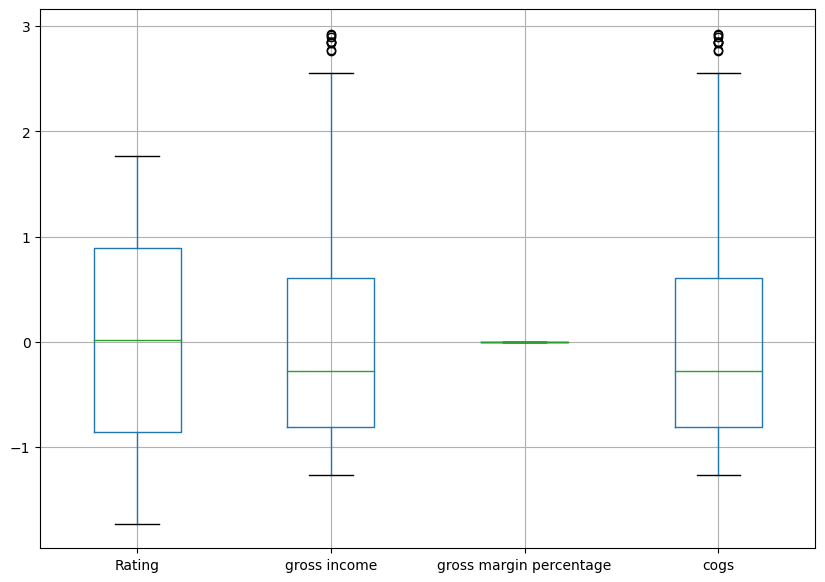

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the cleaned dataset
df = pd.read_csv('cleaned_database.csv')
# Select the columns you want to plot
data_columns = ['Rating', 'gross income', 'gross margin percentage', 'cogs']
# Create a boxplot
fig, ax = plt.subplots(figsize=(10,7))
bp = df[data_columns].boxplot(ax=ax)
plt.show()

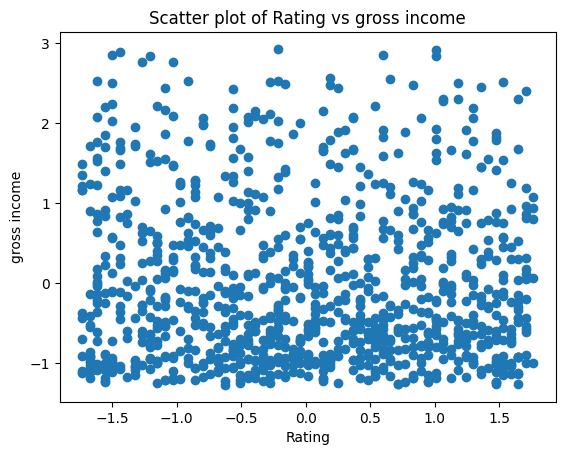

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Read the cleaned CSV file
df = pd.read_csv('cleaned_database.csv')
# Selecting 'Supplemental Number' and 'Other Costs' columns
x = df['Rating']
y = df['gross income']
# Scatter plot
plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('gross income')
plt.title('Scatter plot of Rating vs gross income')
plt.show()

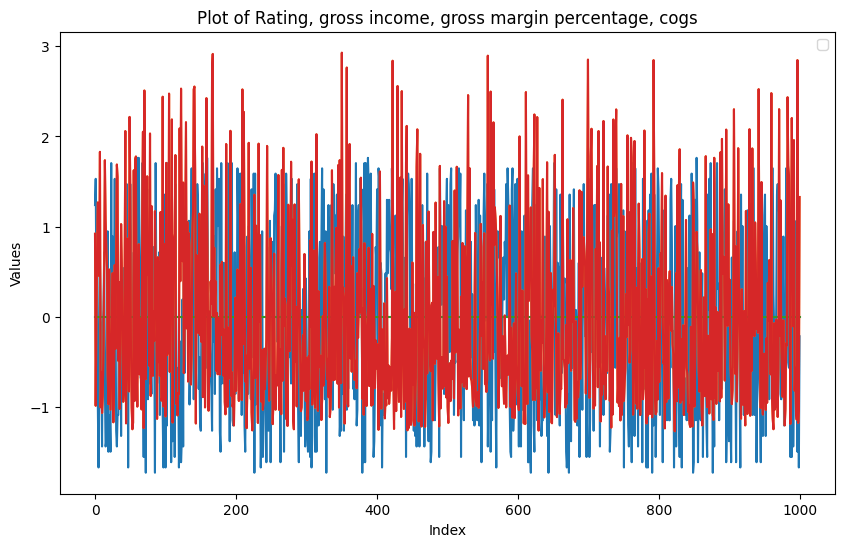

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
# Read the CSV file
df = pd.read_csv('cleaned_database.csv')
# Plotting
plt.figure(figsize=(10, 6))
# Add legend
plt.legend()
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of Rating, gross income, gross margin percentage, cogs')
# Plotting 'Rating', 'gross income', 'gross margin percentage', 'cogs'
plt.plot(df.index, df['Rating'], label='Rating')
plt.plot(df.index, df['gross income'], label='gross income')
plt.plot(df.index, df['gross margin percentage'], label='gross margin percentage')
plt.plot(df.index, df['cogs'], label='cogs')
# Show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

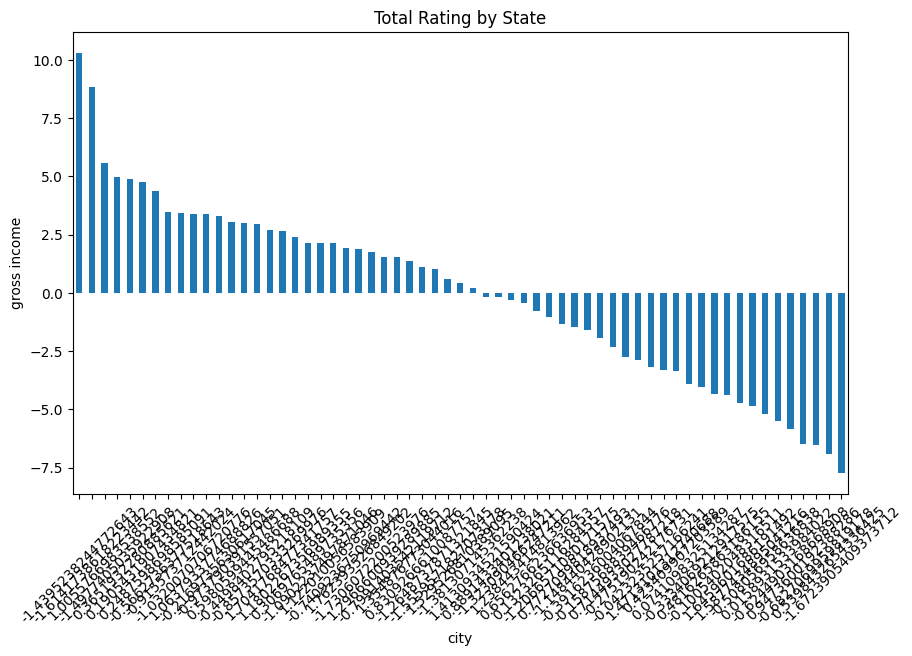

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
# Read the CSV file
df = pd.read_csv('cleaned_database.csv')
# Grouping the data by 'Rating' and calculating the sum of 'gross income' for each state
state_costs = df.groupby('Rating')['gross income'].sum()
# Sorting the states based on their total costs
state_costs = state_costs.sort_values(ascending=False)
# Plotting the bar chart
plt.figure(figsize=(10,6))
state_costs.plot(kind='bar')
plt.title('Total Rating by State')
plt.xlabel('state')
plt.ylabel('gross income')
plt.xticks(rotation=45)
plt.show

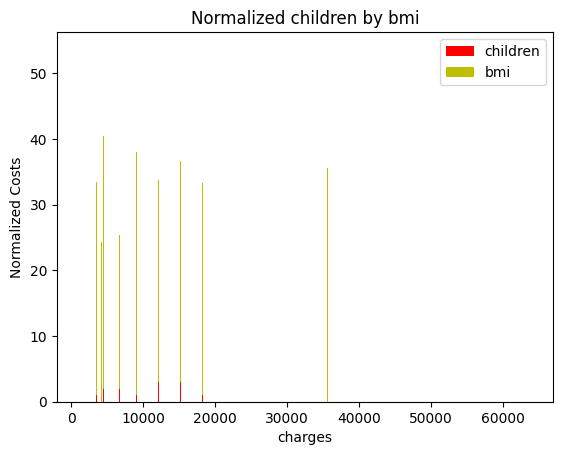

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
# Read the CSV file
df = pd.read_csv('insurance.csv')
# Aggregate costs by year
costs_by_year = df.groupby('charges')[['children', 'bmi']].mean()
# Plotting
x = costs_by_year.index
y1 = costs_by_year['children']
y2 = costs_by_year['bmi']
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='y')
plt.xlabel("charges")
plt.ylabel("Normalized Costs")
plt.legend(["children", "bmi"])
plt.title("Normalized children by bmi")
plt.show()

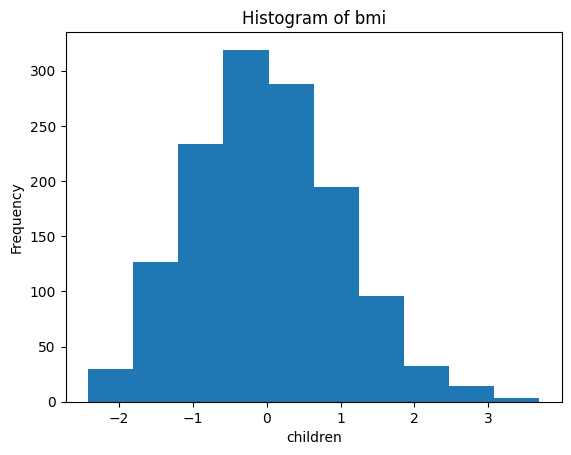

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Read the CSV file
df = pd.read_csv('insurance.csv')
# Scale the data
scaler = StandardScaler()
cols_to_normalize = ['charges', 'children', 'age','bmi']
scaled_data = scaler.fit_transform(df[cols_to_normalize])
df[cols_to_normalize] = scaled_data
# Plot histogram
plt.hist(df['bmi'])
plt.xlabel('children')
plt.ylabel('Frequency')
plt.title('Histogram of bmi')
plt.show()

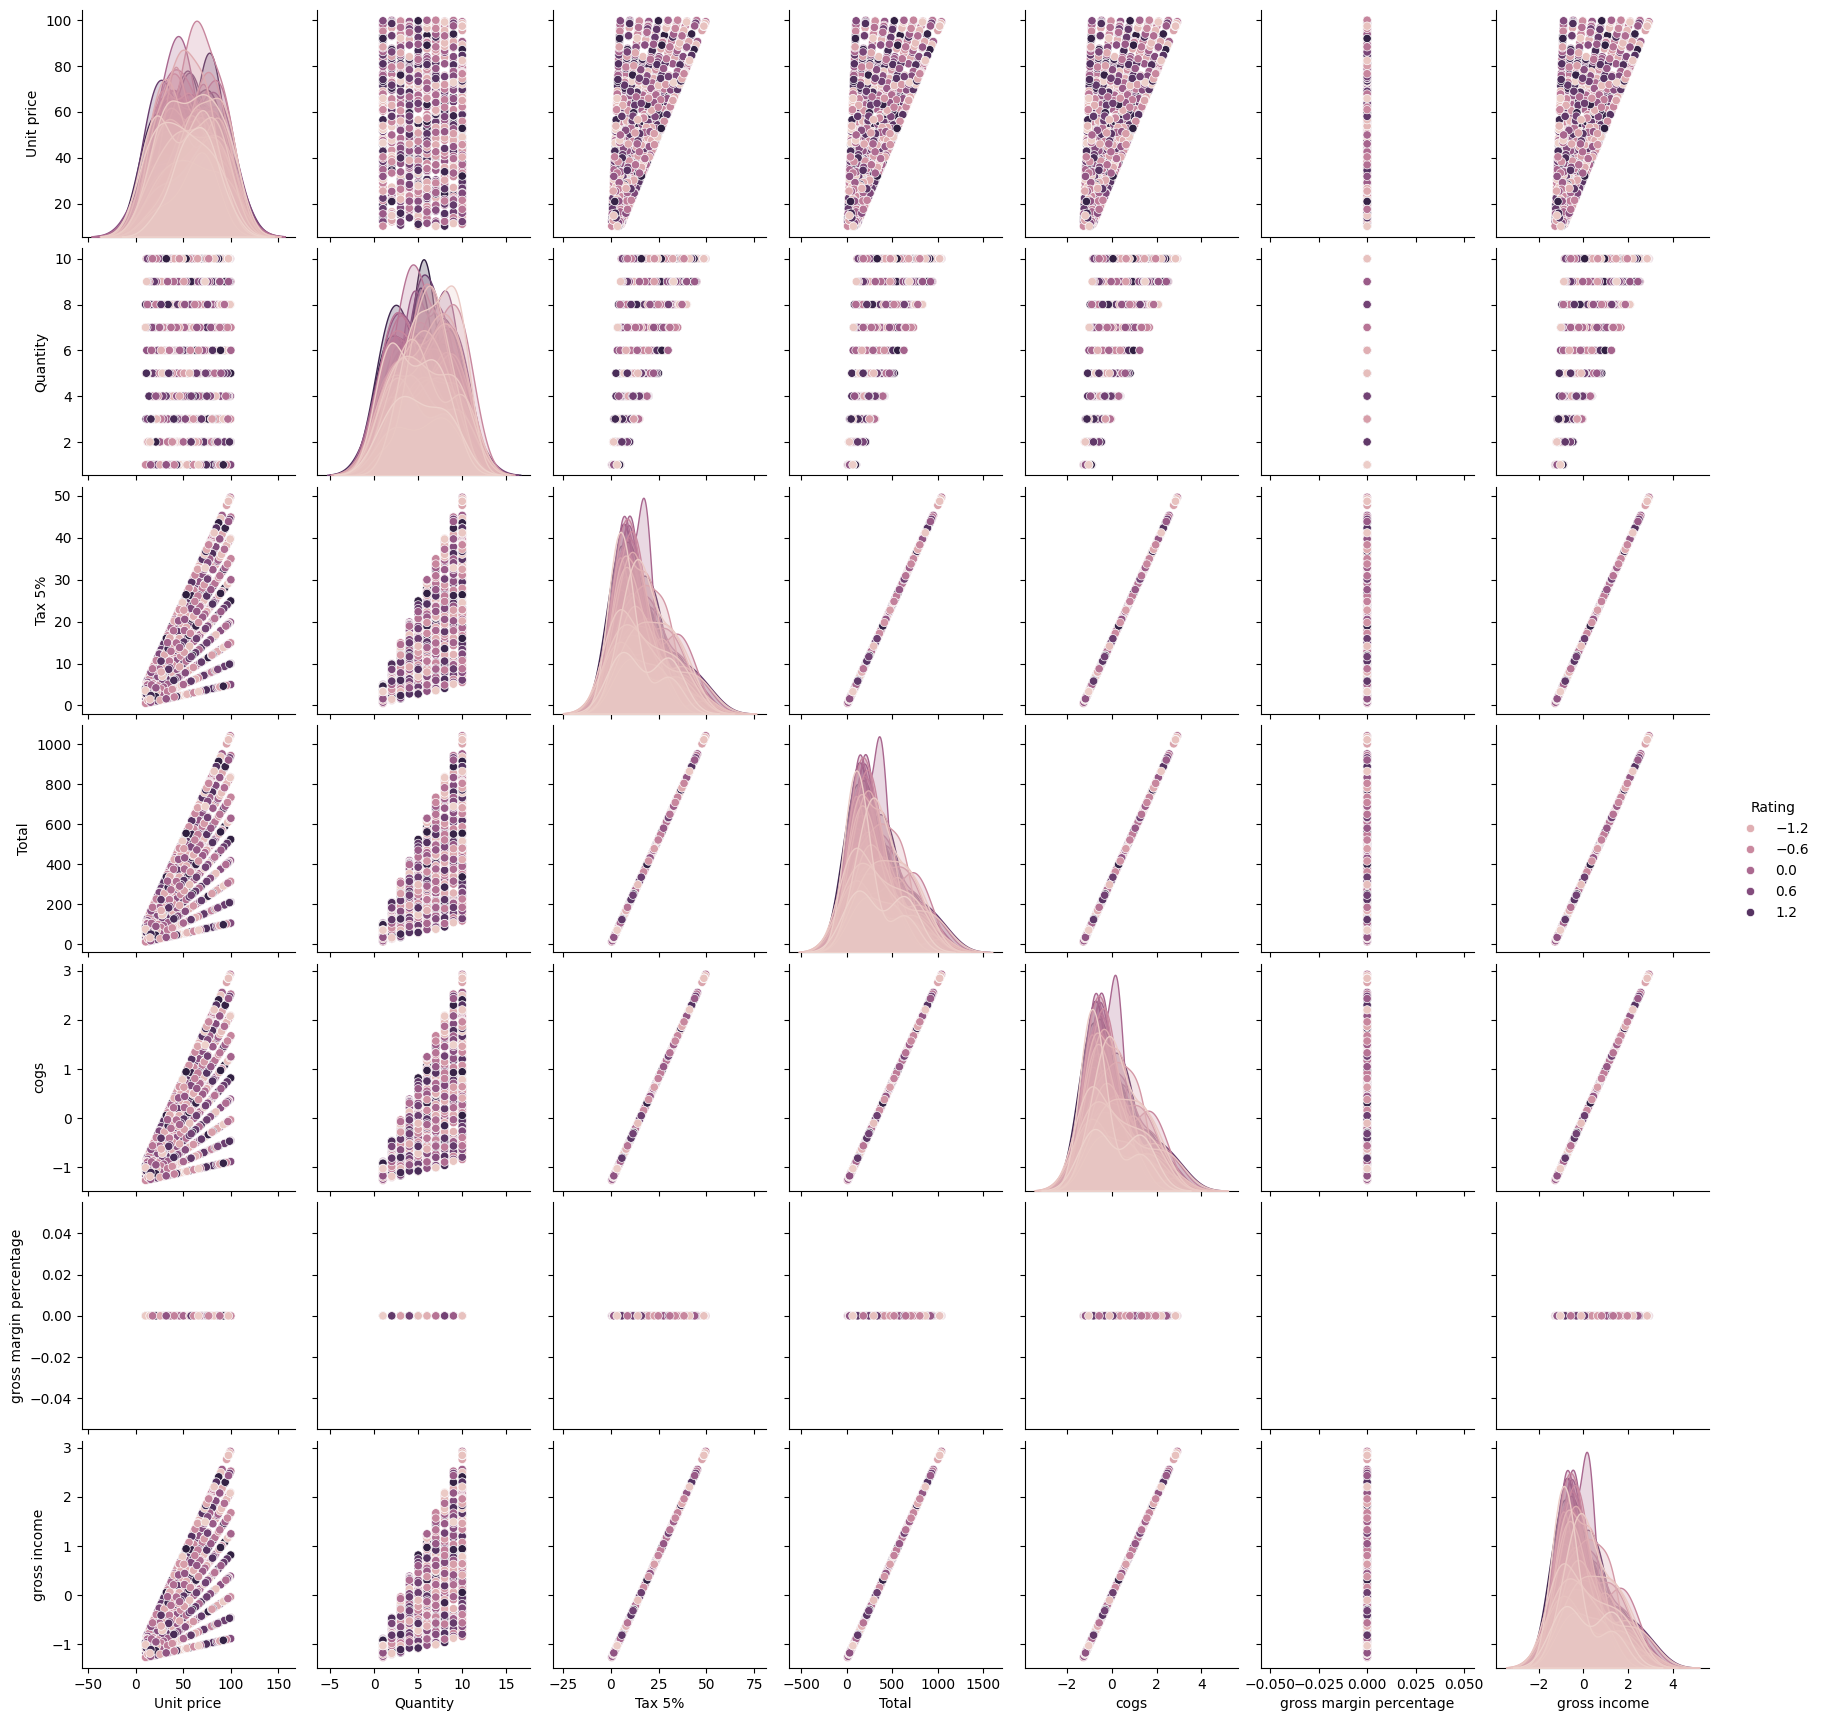

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Load your cleaned dataset
df = pd.read_csv('cleaned_database.csv')
# Plot pairplot
sns.pairplot(df, hue='Rating')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

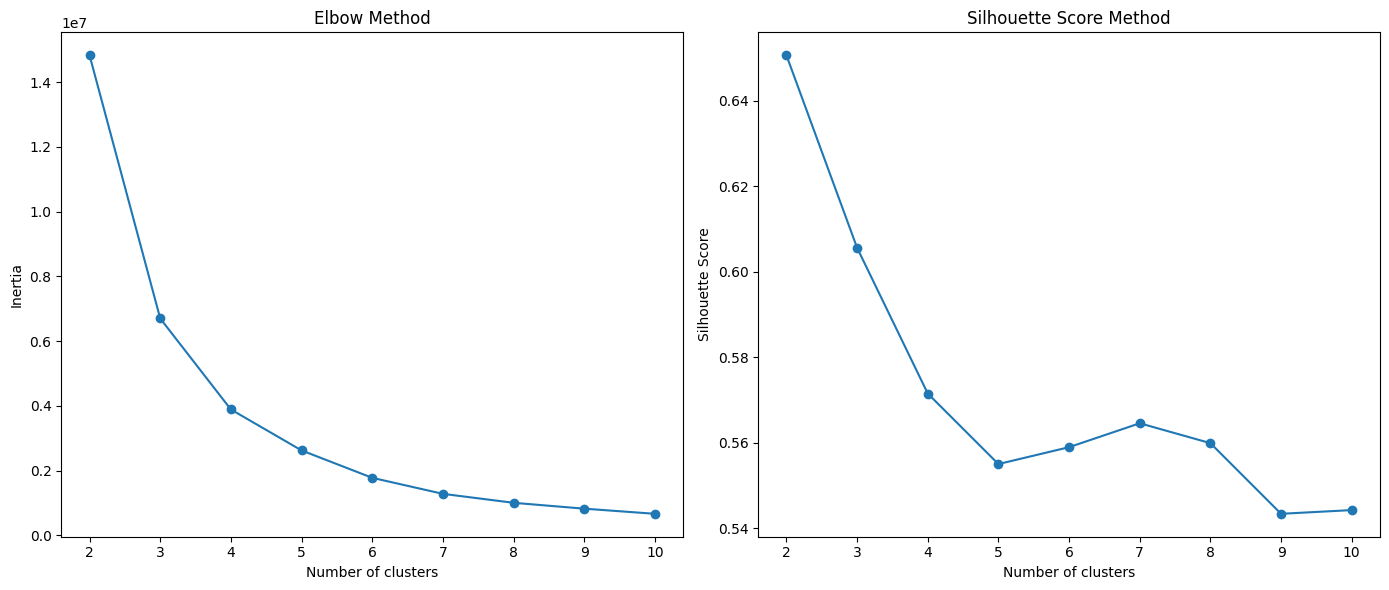

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load your cleaned dataset
df = pd.read_csv('cleaned_database.csv')

# Select columns for K-Means clustering
X = df[['cogs', 'Rating', 'gross income', 'gross margin percentage']]

# Apply K-Means algorithm and calculate inertia and silhouette scores
inertias = []
silhouette_scores = []

for i in range(2, 11):  # silhouette_score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow method to find optimal number of clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()







/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


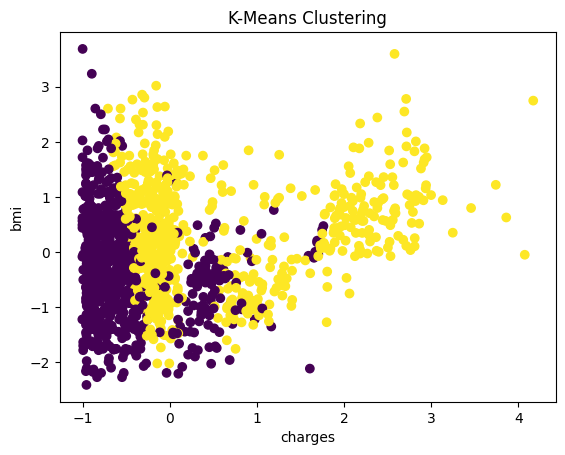

In [ ]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
# Plot K-Means clustering
plt.scatter(X['charges'], X['bmi'], c=kmeans.labels_)
plt.xlabel('charges')
plt.ylabel('bmi')
plt.title('K-Means Clustering')
plt.show()


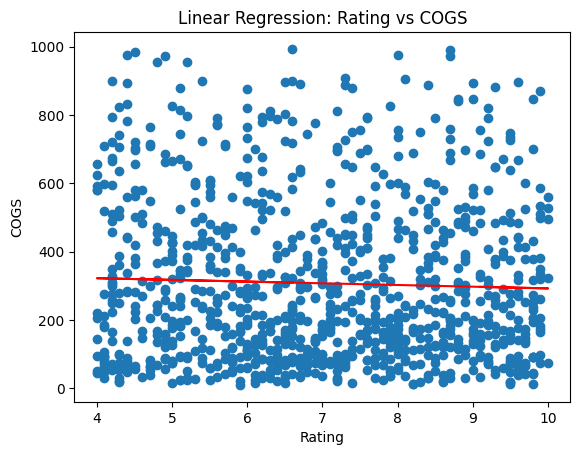

R-squared value: 0.001327997863089711


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
data = pd.read_csv('supermarket_sales - Sheet1.csv')

# Selecting the columns
x = data['Rating']
y = data['cogs']

# Remove rows with missing values
x = x.dropna()
y = y.dropna()

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Define the linear regression function
def myfunc(x):
    return slope * x + intercept

# Create the regression line
mymodel = list(map(myfunc, x))

# Plotting the scatter plot and the regression line
plt.scatter(x, y)
plt.plot(x, mymodel, color='red')
plt.xlabel('Rating')
plt.ylabel('COGS')
plt.title('Linear Regression: Rating vs COGS')
plt.show()

# Calculate and print R-squared value
r_squared = r ** 2
print("R-squared value:", r_squared)



In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('supermarket_sales - Sheet1.csv')

# Assuming 'Rating' is the target variable and others are features
# Select relevant columns for X and y
X = data[['cogs', 'gross income', 'gross margin percentage']]
y = data['Rating']  # Replace 'Rating' with the actual target variable

# Check if the target variable is binary or categorical for logistic regression
# Here, for simplicity, we convert 'Rating' to a binary classification problem
y = (y > y.median()).astype(int)  # Example of converting to binary classification

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=24)

# Logistic Regression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc * 100)


Logistic Regression model accuracy (in %): 48.4
